In [ ]:
# # We will be building a model for predicitng the weather cconditions in Chicago,U.S. For this project, the data has taken from 
# National Centers for Environmental information. 

In [2]:
import pandas as pd
import numpy as np 

In [3]:
weather = pd.read_csv("C:/Users/Tushar Chandel/Downloads/3352683.csv", index_col='DATE')

In [4]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
weather.shape

(23163, 48)

# Data Cleaning & Preprocessing 

In [10]:
#Finding the null values in each columns of the dataframe 
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.509994
ACSH       0.509951
AWND       0.378794
FMTM       0.563183
PGTM       0.269525
PRCP       0.000043
PSUN       0.944783
SNOW       0.008030
SNWD       0.016233
TAVG       0.724172
TMAX       0.000000
TMIN       0.000000
TSUN       0.722014
WDF1       0.557268
WDF2       0.569313
WDF5       0.570392
WDFG       0.481285
WDFM       0.999741
WESD       0.697535
WSF1       0.557182
WSF2       0.569313
WSF5       0.570392
WSFG       0.481026
WSFM       0.998791
WT01       0.618227
WT02       0.969736
WT03       0.894098
WT04       0.986142
WT05       0.980961
WT06       0.982861
WT07       0.995683
WT08       0.692311
WT09       0.986832
WT10       0.999957
WT11       0.996071
WT13       0.893321
WT14       0.953978
WT15       0.996374
WT16       0.664422
WT17       0.996676
WT18       0.855545
WT19       0.999568
WT21       0.998618
WT22       0.995553
WV03       0.996978
WV20       0.999957
dtype: float64

In [196]:
weather.dtypes

ACMH      float64
ACSH      float64
AWND      float64
FMTM      float64
PGTM      float64
PRCP      float64
PSUN      float64
SNOW      float64
SNWD      float64
TAVG      float64
TMAX        int64
TMIN        int64
TSUN      float64
WDF1      float64
WDF2      float64
WDF5      float64
WDFG      float64
WDFM      float64
WESD      float64
WSF1      float64
WSF2      float64
WSF5      float64
WSFG      float64
WSFM      float64
WT01      float64
WT02      float64
WT03      float64
WT04      float64
WT05      float64
WT06      float64
WT07      float64
WT08      float64
WT09      float64
WT10      float64
WT11      float64
WT13      float64
WT14      float64
WT15      float64
WT16      float64
WT17      float64
WT18      float64
WT19      float64
WT21      float64
WT22      float64
WV03      float64
WV20      float64
target    float64
dtype: object

In [193]:
weather = weather.drop(['NAME', 'STATION' ], axis =1)

In [195]:
weather['target'] = main_weather.shift(-1)['temp_max']

In [209]:
# Replacing all null values with 0 
weather = weather.replace([np.nan, -np.nan], 0)

In [210]:
weather.apply(pd.isnull).sum()

ACMH      0
ACSH      0
AWND      0
FMTM      0
PGTM      0
PRCP      0
PSUN      0
SNOW      0
SNWD      0
TAVG      0
TMAX      0
TMIN      0
TSUN      0
WDF1      0
WDF2      0
WDF5      0
WDFG      0
WDFM      0
WESD      0
WSF1      0
WSF2      0
WSF5      0
WSFG      0
WSFM      0
WT01      0
WT02      0
WT03      0
WT04      0
WT05      0
WT06      0
WT07      0
WT08      0
WT09      0
WT10      0
WT11      0
WT13      0
WT14      0
WT15      0
WT16      0
WT17      0
WT18      0
WT19      0
WT21      0
WT22      0
WV03      0
WV20      0
target    0
dtype: int64

In [199]:
from sklearn.feature_selection import mutual_info_regression

In [211]:
#Mutual information: There are many features presented in the dataset, so we will be using mutual information to construct a
# ranking with a feature utility metric

def calculate_ml_scores(kf):
    X = kf.copy()
    y = X["target"]
    
    X.drop("target", axis=1, inplace = True)
    
    
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()
    
    

    discrete_features = X.dtypes == int
    
 
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return X, y, mi_scores

In [212]:
X,y, mi_scores = calculate_ml_scores(kf =weather)

In [213]:
mi_scores

TMAX    0.921946
TMIN    0.785255
TAVG    0.224215
WT18    0.171041
SNWD    0.158970
SNOW    0.110007
WESD    0.074576
AWND    0.044519
WDFG    0.033982
ACSH    0.031625
PGTM    0.031521
WDF1    0.030784
TSUN    0.030211
WDF5    0.030133
WDF2    0.029844
WT03    0.029098
WT09    0.024908
ACMH    0.024882
FMTM    0.024093
WSF1    0.019370
WT14    0.016454
PRCP    0.015743
WT04    0.015720
WSF5    0.015613
WSFG    0.015267
WT16    0.015156
WT01    0.014668
WSF2    0.012141
WT06    0.011432
WT08    0.009590
WT07    0.009385
WT11    0.009165
WSFM    0.008881
WT22    0.008056
WT05    0.007744
WV20    0.006798
PSUN    0.006432
WV03    0.005695
WT15    0.005401
WT13    0.004875
WT02    0.002445
WDFM    0.001504
WT10    0.000000
WT17    0.000000
WT19    0.000000
WT21    0.000000
Name: MI Scores, dtype: float64

In [12]:
# Selecting the main features of the data set 
main_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

In [14]:
# Renaming the columns 
main_weather.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min' ]

In [15]:
main_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,35,27
1960-01-02,0.00,0.0,0.0,43,31
1960-01-03,0.00,0.0,0.0,31,13
1960-01-04,0.00,0.0,0.0,21,8
1960-01-05,0.00,0.0,0.0,20,9
...,...,...,...,...,...
2023-05-28,0.00,0.0,0.0,80,53
2023-05-29,0.00,0.0,0.0,86,53
2023-05-30,0.00,0.0,0.0,91,59


In [32]:
main_weather.apply(pd.isnull).sum()/weather.shape[0]

precip        0.000043
snow          0.000000
snow_depth    0.000000
temp_max      0.000000
temp_min      0.000000
dtype: float64

In [36]:
#Checking for any null values 
main_weather.apply(pd.isnull).sum()/weather.shape[0]

precip        0.0
snow          0.0
snow_depth    0.0
temp_max      0.0
temp_min      0.0
dtype: float64

In [37]:
#Checking the datatypes of our variables 
main_weather.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max        int64
temp_min        int64
dtype: object

In [214]:
main_weather.index

DatetimeIndex(['1960-01-31', '1960-02-01', '1960-02-02', '1960-02-03',
               '1960-02-04', '1960-02-05', '1960-02-06', '1960-02-07',
               '1960-02-08', '1960-02-09',
               ...
               '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28',
               '2023-05-29', '2023-05-30'],
              dtype='datetime64[ns]', name='DATE', length=23131, freq=None)

In [47]:
# Converting the object data type to datetime object.
main_weather.index = pd.to_datetime(main_weather.index)

In [49]:
main_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=23163)

In [40]:
main_weather.apply(lambda x: (x==9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

# Exploratory data analysis

<Axes: xlabel='DATE'>

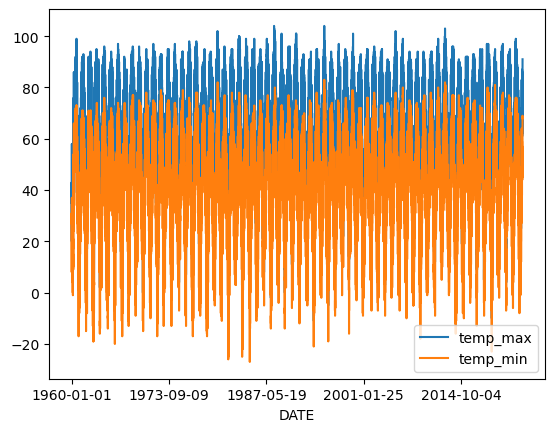

In [41]:
main_weather[['temp_max', 'temp_min']].plot()

In [50]:
main_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2019    365
2020    366
2021    365
2022    365
2023    152
Name: DATE, Length: 64, dtype: int64

<Axes: xlabel='DATE'>

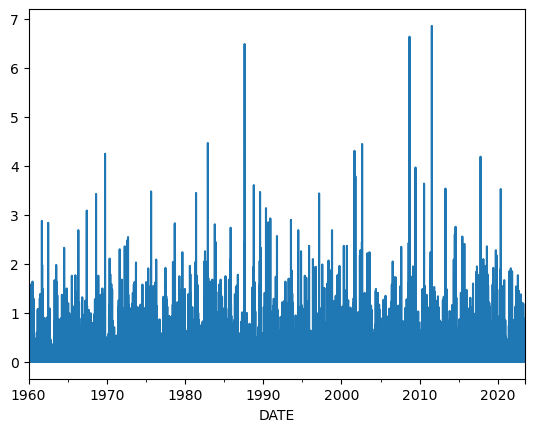

In [51]:
main_weather['precip'].plot()

In [53]:
main_weather.groupby(main_weather.index.year).sum()['precip']

DATE
1960    28.20
1961    36.78
1962    21.77
1963    25.27
1964    29.73
        ...  
2019    49.54
2020    39.22
2021    30.15
2022    31.99
2023    13.84
Name: precip, Length: 64, dtype: float64

In [54]:
main_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,35,27
1960-01-02,0.00,0.0,0.0,43,31
1960-01-03,0.00,0.0,0.0,31,13
1960-01-04,0.00,0.0,0.0,21,8
1960-01-05,0.00,0.0,0.0,20,9
...,...,...,...,...,...
2023-05-28,0.00,0.0,0.0,80,53
2023-05-29,0.00,0.0,0.0,86,53
2023-05-30,0.00,0.0,0.0,91,59


# Model Training 

In [55]:
# Predicting tomorrow's temperature using data from today 
main_weather['target'] = main_weather.shift(-1)['temp_max']

In [56]:
main_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.00,0.0,0.0,35,27,43.0
1960-01-02,0.00,0.0,0.0,43,31,31.0
1960-01-03,0.00,0.0,0.0,31,13,21.0
1960-01-04,0.00,0.0,0.0,21,8,20.0
1960-01-05,0.00,0.0,0.0,20,9,34.0
...,...,...,...,...,...,...
2023-05-28,0.00,0.0,0.0,80,53,86.0
2023-05-29,0.00,0.0,0.0,86,53,91.0
2023-05-30,0.00,0.0,0.0,91,59,91.0


In [58]:
# Droping the last row containg the null value 
main_weather =main_weather.iloc[:-1,:].copy()

In [59]:
main_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.0,0.0,0.0,35,27,43.0
1960-01-02,0.0,0.0,0.0,43,31,31.0
1960-01-03,0.0,0.0,0.0,31,13,21.0
1960-01-04,0.0,0.0,0.0,21,8,20.0
1960-01-05,0.0,0.0,0.0,20,9,34.0
...,...,...,...,...,...,...
2023-05-26,0.0,0.0,0.0,70,45,74.0
2023-05-27,0.0,0.0,0.0,74,47,80.0
2023-05-28,0.0,0.0,0.0,80,53,86.0


In [60]:

features = ['precip', 'snow','snow_depth', 'temp_max', 'temp_min']
label = ['target']

In [62]:
# We cannot use the future data to predict the past weather conditions, which is why we cannot use the train-test split since
# it will randomly split our data without consideriing the time boundation
train = main_weather.loc[:"2020-12-31"]

In [63]:
test = main_weather.loc["2021-01-01":]

# 1) Ridge Regression

In [65]:
from sklearn.linear_model import Ridge

In [67]:
clf = Ridge(alpha=1.0)
clf.fit(train[features], train[label])

Ridge()

In [69]:
predictions = clf.predict(test[features])

In [71]:
from sklearn.metrics import mean_absolute_error

In [72]:
 error = mean_absolute_error(test[label], predictions)

6.4594319012205945

In [77]:
from sklearn.metrics import r2_score

In [79]:
r2_score(test[label], predictions)

0.8424525885857976

In [87]:
combined = pd.concat([test['target'], pd.Series(predictions.flatten(), index=test.index)], axis =1)

In [90]:
combined.columns = ["actual", "predictions"]

In [91]:
combined

,actual,predictions
DATE,,
2021-01-01,35.0,34.094795
2021-01-02,33.0,39.115625
2021-01-03,30.0,36.612877
2021-01-04,37.0,34.566128
2021-01-05,39.0,40.798726
...,...,...
2023-05-26,74.0,68.537352
2023-05-27,80.0,71.903555
2023-05-28,86.0,77.636346


<Axes: xlabel='DATE'>

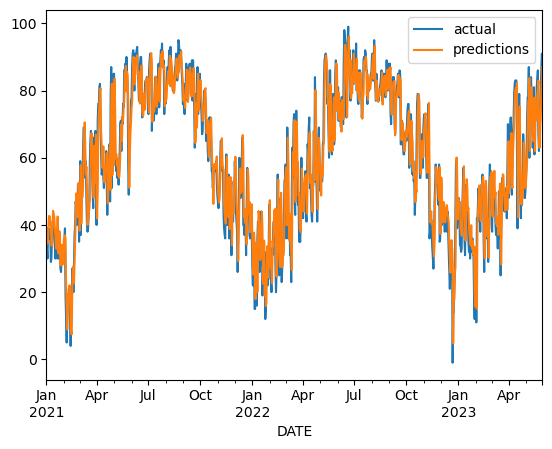

In [92]:
combined.plot()

In [93]:
clf.coef_

array([[-3.82128362, -1.1929459 , -0.04068072,  0.72763661,  0.2278285 ]])

# Improving our model - Adding more features to the dataset 

In [116]:
def cr_prediction(features, main_weather, clf):
    train = main_weather.loc[:"2020-12-31"]
    test = main_weather.loc["2021-01-01":]
    clf.fit(train[features], train[label])
    predictions1 = clf.predict(test[features])
    error1 = mean_absolute_error(test[label], predictions)
    combined1 = pd.concat([test['target'], pd.Series(predictions1.flatten(), index=test.index)], axis =1)
    combined1.columns = ["actual", "predictions"]
    return error1, combined1 
    
    

# Try-1 

In [95]:
main_weather['month_avg_max'] = main_weather['temp_max'].rolling(30).mean()

In [102]:
main_weather = main_weather.iloc[30:,:].copy()

In [98]:
main_weather['month_day_max'] = main_weather['month_avg_max'] / main_weather['temp_max']

In [100]:
main_weather['min_max'] = main_weather['temp_max']/main_weather['temp_min']

In [160]:
features = ['precip', 'snow','snow_depth', 'temp_max', 'temp_min', 'month_avg_max','month_day_max','min_max'] 

In [161]:
error1, combined1  =  cr_prediction(features, main_weather, clf)

In [162]:
# There has been a slight reduction in our error from 6.4 to 6.3
error1

6.314085322466517

<Axes: xlabel='DATE'>

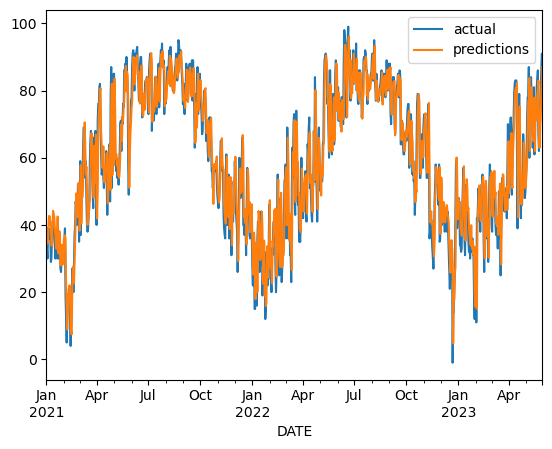

In [163]:
combined.plot()

# Try-2 - Adding more features 

In [177]:
main_weather['month_avg'] = main_weather['temp_max'].groupby(main_weather.index.month).apply(lambda x: x.expanding(1).mean())

C:\Users\Tushar Chandel\AppData\Local\Temp\ipykernel_28692\3150891963.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  main_weather['month_avg'] = main_weather['temp_max'].groupby(main_weather.index.month).apply(lambda x: x.expanding(1).mean())


In [215]:
main_weather

,precip,snow,snow_depth,temp_max,temp_min,target,month_avg_max,month_day_max,min_max,month_avg,day_avg
DATE,,,,,,,,,,,
1960-01-31,0.0,0.0,0.0,40,27,34.0,32.566667,0.814167,1.481481,40.000000,40.00000
1960-02-01,0.0,0.0,0.0,34,28,29.0,32.266667,0.949020,1.214286,34.000000,34.00000
1960-02-02,0.0,0.0,0.0,29,24,34.0,32.200000,1.110345,1.208333,31.500000,29.00000
1960-02-03,0.0,0.0,0.0,34,24,37.0,32.633333,0.959804,1.416667,32.333333,34.00000
1960-02-04,0.2,0.0,0.0,37,28,39.0,33.200000,0.897297,1.321429,33.500000,37.00000
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,0.0,0.0,0.0,70,45,74.0,70.100000,1.001429,1.555556,70.079838,72.46875
2023-05-27,0.0,0.0,0.0,74,47,80.0,70.333333,0.950450,1.574468,70.081818,73.06250
2023-05-28,0.0,0.0,0.0,80,53,86.0,70.900000,0.886250,1.509434,70.086825,73.87500


In [179]:
main_weather['day_avg'] = main_weather['temp_max'].groupby(main_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

C:\Users\Tushar Chandel\AppData\Local\Temp\ipykernel_28692\4138787386.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  main_weather['day_avg'] = main_weather['temp_max'].groupby(main_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())


In [218]:
features = ['precip', 'snow','snow_depth', 'temp_max', 'temp_min', 'month_avg_max','month_day_max','min_max','month_avg', 'day_avg'] 

In [183]:
error1, combined1  =  cr_prediction(features, main_weather, clf)

In [184]:
#Again there has been a slight reduction in our error, we can improve this further by adding/removing more features or
# trying different models 
error1

6.080564187854534

In [185]:
main_weather.corr()['target']

precip           0.042115
snow            -0.246152
snow_depth      -0.382802
temp_max         0.922476
temp_min         0.886335
target           1.000000
month_avg_max    0.855239
month_day_max   -0.181732
min_max         -0.039281
month_avg        0.874552
day_avg          0.887885
Name: target, dtype: float64

In [188]:
combined1

,actual,predictions
DATE,,
2021-01-01,35.0,31.393268
2021-01-02,33.0,35.432624
2021-01-03,30.0,33.528367
2021-01-04,37.0,32.021184
2021-01-05,39.0,36.425011
...,...,...
2023-05-26,74.0,70.403541
2023-05-27,80.0,72.986367
2023-05-28,86.0,77.203576


# Try - 3 (Trying a different model)

In [222]:
from sklearn.linear_model import LinearRegression

In [224]:
train = main_weather.loc[:"2020-12-31"]
test = main_weather.loc["2021-01-01":]

In [226]:
reg = LinearRegression()
reg.fit(train[features], train['target'])

LinearRegression()

In [227]:
predictions1 = reg.predict(test[features])

In [228]:
error = mean_absolute_error(test[label], predictions1)

In [229]:
error

6.080554003571786